#**Muhammad Talha Syed**<br>
#**21i-0277**


#**Final Project Notebook** <br>
##The final submission contains a .py file, a jupyter notebook

In [40]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import texthero as hero
import matplotlib.pyplot as plt




In [41]:

import os
for dirname, _, filenames in os.walk('./FINAL/images/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./FINAL/images/image_1.jpg
./FINAL/images/image_10.png
./FINAL/images/image_100.jpg
./FINAL/images/image_1000.png
./FINAL/images/image_1001.png
./FINAL/images/image_1002.png
./FINAL/images/image_1003.png
./FINAL/images/image_1004.png
./FINAL/images/image_1005.jpg
./FINAL/images/image_1006.png
./FINAL/images/image_1007.jpg
./FINAL/images/image_1008.png
./FINAL/images/image_1009.png
./FINAL/images/image_101.jpg
./FINAL/images/image_1010.png
./FINAL/images/image_1011.png
./FINAL/images/image_1012.png
./FINAL/images/image_1013.png
./FINAL/images/image_1014.png
./FINAL/images/image_1015.png
./FINAL/images/image_1016.jpg
./FINAL/images/image_1017.png
./FINAL/images/image_1018.jpg
./FINAL/images/image_1019.jpg
./FINAL/images/image_102.jpg
./FINAL/images/image_1020.png
./FINAL/images/image_1021.png
./FINAL/images/image_1022.png
./FINAL/images/image_1023.png
./FINAL/images/image_1024.png
./FINAL/images/image_1025.jpg
./FINAL/images/image_1026.jpg
./FINAL/images/image_1027.jpg
./FINAL/images/ima

In [42]:
# # function to unrar the rar file
# # importing patoolib to run rar.exe

# import patoolib
# # zip file to be extracted
# to_be_extracted="final project.rar"
 
# # extraction directory
# where_extract="D:\PAI\PAI Project\FINAL"

# def file_extractor(to_be_extracted,where_extract):
#     return patoolib.extract_archive(to_be_extracted, outdir=where_extract)
# file_extractor(to_be_extracted,where_extract)


In [43]:
df=pd.read_csv('./FINAL/labels.csv', index_col=False, header=0)
df
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df['text_corrected']=hero.clean(df['text_corrected'])
df.head()

,image_name,text_ocr,text_corrected,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,look friend lightyear sohalikut trend play yea...,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,best yearchallenge completed less years kudus ...,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,sam thorne strippin follow follow saw everyone...,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,year challenge sweet dee edition,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,year challenge filter hilarious year challenge...,neutral


In [44]:
change={'very_positive': 1, 'positive':1,'negative':-1,'very_negative':-1,'neutral':0}
df["Labels"]=df["overall_sentiment"].map(change)
X=df.drop(["Labels","overall_sentiment","text_ocr","image_name"], axis=1)
X=list(X)
y=df["Labels"]
y-np.array(y)


0       0
1       0
2       0
3       0
4       0
       ..
6987    0
6988    0
6989    0
6990    0
6991    0
Name: Labels, Length: 6830, dtype: int64

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize,word_tokenize
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(df.text_corrected)
from sklearn.preprocessing import MaxAbsScaler
MAS=MaxAbsScaler()
new_scaled=MAS.fit_transform(X)
X=(new_scaled)
X_train, X_test, y_train, y_test =train_test_split(X, y)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.49414519906323184
F1 SCORE: 0.47733517720557656
              precision    recall  f1-score   support

          -1       0.15      0.08      0.11       165
           0       0.31      0.27      0.29       525
           1       0.60      0.67      0.63      1018

    accuracy                           0.49      1708
   macro avg       0.35      0.34      0.34      1708
weighted avg       0.47      0.49      0.48      1708



d:\Conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


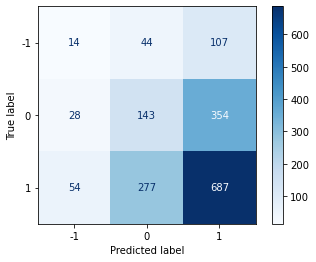

In [47]:

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predicty=dtree.predict(X_test)
F1score=f1_score(y_test,predicty,average='weighted')
print("Accuracy:",accuracy_score(y_test,predicty))
print("F1 SCORE:",F1score)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtree, X_test, y_test, cmap=plt.cm.Blues)


print(classification_report(y_test,predicty))

In [48]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
regr=LogisticRegression(multi_class='multinomial',random_state=1)
regr.fit(X_train,y_train)
print('Interccept: \n', regr.intercept_)
# The coefficients

print('Coefficients: \n', regr.coef_,'')
pred=regr.predict(X_test)
pred
print("F1 score: ",f1_score(y_test,pred,average='weighted'))

Interccept: 
 [-1.19265193  0.1826917   1.00996023]
Coefficients: 
 [[ 0.         -0.03251212 -0.06284351 ... -0.0470994   0.23869121
  -0.01423268]
 [ 0.         -0.07076019 -0.09118453 ... -0.13390717 -0.10157193
  -0.03438648]
 [ 0.          0.10327231  0.15402804 ...  0.18100657 -0.13711928
   0.04861917]] 
F1 score:  0.4815797143258258


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=50,random_state=1,n_jobs=3)
clf.fit(X_train,y_train)
PRED=clf.predict(X_test)
print("F1 SCORE: ",f1_score(y_test,PRED,average='weighted'))


F1 SCORE:  0.46911450541671423


In [50]:
KNN=KNeighborsClassifier(n_neighbors=5,algorithm='brute')
KNN.fit(X_train,y_train)
predd=KNN.predict(X_test)
print("F1 SCORE: ",f1_score(y_test,predd,average='weighted'))

F1 SCORE:  0.44009895671174515


In [51]:
# from PIL import Image
# import pytesseract
# def read_image(i):
#     #using Tesseract to extract text from memes
#     #define path to tesseract
#     path_to_tesseract = "tesseract.exe"
#     #Define path to image
#     path_to_image = "FINAL/images/image_{}.jpg".format(i)
#     #Point tessaract_cmd to tessaract.exe
#     pytesseract.tesseract_cmd = path_to_tesseract
#     #Open image with PIL
#     img = Image.open(path_to_image)
#     #Extract text from image
#     text = pytesseract.image_to_string(img)
#     df["Index"]=i
#     df["text_ocr"]=text
    
# for i in range(1,6992):
#     read_image(i)
# df



In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
sc = StandardScaler(with_mean=False)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

prcptrnFS = Perceptron(eta0=1, random_state=152)
prcptrnFS.fit(X_train_std, y_train)
 
Y_predict_std = prcptrnFS.predict(X_test_std)
print("Misclassified examples %d" %(y_test != Y_predict_std).sum())
 
from sklearn.metrics import accuracy_score
print("Accuracy Score %0.3f" % accuracy_score(y_test, Y_predict_std))
print("F1 SCORE: ",f1_score(y_test,Y_predict_std, average='weighted'))

Misclassified examples 927
Accuracy Score 0.457
F1 SCORE:  0.4531388424870918


In [53]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('LR',LogisticRegression(solver='sag',multi_class='multinomial',max_iter=500)))
# estimator.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
estimator.append(('DTC',DecisionTreeClassifier()))
estimator.append(('PRCPTRN',Perceptron(eta0=0.1, random_state=152)))

eclf1=VotingClassifier(estimators=estimator,voting='hard')
eclf1=eclf1.fit(X_train,y_train)
P=eclf1.predict(X_test)
print("F1 SCORE: ",f1_score(y_test,P,average='weighted')*100)


F1 SCORE:  47.36511442980853


In [54]:
# resized_img=[]
# store_img=[]
# store_img2=[]
# from PIL import Image
# import glob
# import os


# for filename in glob.glob(r'./FINAL/images/*.png'):
   
#     img=Image.open(filename)
#     store_img.append(img)


# for filename in glob.glob(r'./FINAL/images/*.jpeg'):
   
#     img=Image.open(filename)
#     store_img2.append(img)

# #Appending lists of JPEG and PNG
# for i in store_img2:
#     store_img.append(i)
   
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True


In [55]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# from skimage.io import imread, imshow

In [56]:
# for image in store_img:
#     image=image.resize((256,128))
#     resized_img.append(image)


In [57]:
# resized_img
# R=np.array(resized_img)
# R


In [58]:
# from skimage import filters
# from skimage import feature
# from skimage.filters import prewitt_h,prewitt_v
# # prewitt kernel
# # pre_hor = prewitt_h(resized_img)
# # pre_ver = prewitt_v(resized_img)
# ed_sobel=[]
# # Sobel Kernel
# for i in resized_img:
#     ed_sobel.append(filters.sobel(i))

# #canny algorithm
# # can = feature.canny(resized_img)

    

In [59]:
# from skimage.io import imread, imshow
# from PIL import Image
# import glob
# from skimage.transform import resize
# from skimage.filters import prewitt_h,prewitt_v
# def image_feature_extraction(image):
#     try:
#         image_temp=imread('./FINAL/images/'+image, as_gray=True)
#     except:
#         ImageFile.LOAD_TRUNCATED_IMAGES=True
#         image_temp=imread("./FINAL/images/"+image,as_gray=True)
#         image=resize(image_temp, (256,300))
#         ed_sobel=filters.sobel(image)
#         p_h=filters.prewitt_h(ed_sobel)
#         P_h=np.reshape(p_h,(h*w))

In [60]:

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.filters import prewitt_h,prewitt_v

images = df['image_name']
sentiments1 = df['Labels']
data_for_images_prewitt_v_features = []
sentiments1.reset_index(inplace=True, drop=True)
# images


image_507.png
image_1012.png
image_1512.jpg
image_2014.png
image_2516.jpg
image_3017.jpg
image_3517.jpg
image_4022.jpg
image_4609.jpg
image_5120.jpg
image_5635.JPG
image_6141.jpg


d:\Conda\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


image_6643.jpg
(443, 652)


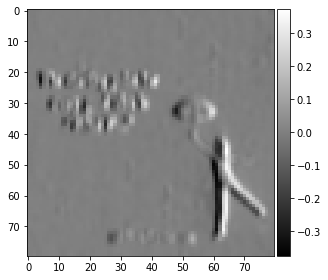

In [61]:
def find_data_for_images():
    img_size = 80
    count = 0
    j = 0
    temp=[]


    for i in images:
        try:
            image1 = imread("./FINAL/images/{}".format(i),as_gray=True)
            
            image_arr = resize(image1,(img_size,img_size))
            
            pre_ver = prewitt_v(image_arr)
            
            data_for_images_prewitt_v_features.append( [pre_ver , sentiments1[j]] )
            
            count+=1
            j+=1
            if(count==500):
                print(i)
                count=0
        except:
            temp.append(np.nan)
            print('NaN')

    
    imshow(pre_ver,cmap='gray')

    print(image1.shape)
    
find_data_for_images()

In [62]:
images_data=data_for_images_prewitt_v_features

In [63]:
X_data_images=[]
y_data_images=[]

for i in images_data:
    X_data_images.append(i[0].flatten())
    y_data_images.append(i[1])


In [64]:
df_X = pd.DataFrame(X_data_images)
df_y = pd.DataFrame(y_data_images)

In [65]:
X_train, X_test, y_train, y_test =train_test_split(df_X, df_y, random_state=21)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5122, 6400)
Shape of y_train =  (5122, 1)
Shape of X_test =  (1708, 6400)
Shape of y_test =  (1708, 1)


In [66]:
from sklearn import tree
model_1 = tree.DecisionTreeClassifier(max_depth=20)
model_1 = model_1.fit(X_train, y_train)

In [67]:
pred_1=model_1.predict(X_test)
model_1.score(X_test,y_test)

0.48653395784543324

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,pred_1)*100)  
print("Report : \n", classification_report(y_test, pred_1))
print("F1 Score : ",f1_score(y_test, pred_1, average='weighted')*100)

Accuracy :  48.65339578454332
Report : 
               precision    recall  f1-score   support

          -1       0.11      0.10      0.10       145
           0       0.31      0.25      0.28       548
           1       0.60      0.67      0.63      1015

    accuracy                           0.49      1708
   macro avg       0.34      0.34      0.34      1708
weighted avg       0.46      0.49      0.47      1708

F1 Score :  47.22528358475655


In [69]:
from sklearn.neighbors import KNeighborsClassifier
model_2=KNeighborsClassifier(n_neighbors=8,weights='distance',algorithm='brute')
model_2.fit(X_train, y_train)
pred_2=model_2.predict(X_test)
model_2.score(X_test,y_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,pred_2)*100)  
print("Report : \n", classification_report(y_test, pred_2))
print("F1 Score : ",f1_score(y_test, pred_2, average='weighted')*100)

d:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy :  59.192037470726
Report : 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       145
           0       0.30      0.01      0.01       548
           1       0.59      0.99      0.74      1015

    accuracy                           0.59      1708
   macro avg       0.30      0.33      0.25      1708
weighted avg       0.45      0.59      0.45      1708

F1 Score :  44.520242825208584


In [70]:
confusion_matrix(pred_1,y_test)

array([[ 14,  44,  68],
       [ 37, 136, 266],
       [ 94, 368, 681]], dtype=int64)

In [71]:
confusion_matrix(pred_2,y_test)

array([[   0,    0,    1],
       [   1,    3,    6],
       [ 144,  545, 1008]], dtype=int64)

In [72]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators=12, random_state=21)
model_3.fit(X_train, y_train)

C:\Users\Talha\AppData\Local\Temp\ipykernel_16860\2013452851.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train, y_train)


RandomForestClassifier(n_estimators=12, random_state=21)

In [73]:
pred_3=model_3.predict(X_test)
model_3.score(X_test,y_test)

0.5310304449648712

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test,pred_3)*100)  
print("Report : \n", classification_report(y_test, pred_3))
print("F1 Score : ",f1_score(y_test, pred_3, average='weighted')*100)

Accuracy :  53.103044496487115
Report : 
               precision    recall  f1-score   support

          -1       0.09      0.01      0.02       145
           0       0.34      0.25      0.29       548
           1       0.60      0.76      0.67      1015

    accuracy                           0.53      1708
   macro avg       0.34      0.34      0.33      1708
weighted avg       0.47      0.53      0.49      1708

F1 Score :  49.09094273466561


In [75]:
confusion_matrix(pred_3,y_test)

array([[  2,   7,  13],
       [ 30, 135, 232],
       [113, 406, 770]], dtype=int64)

In [76]:
X = df.drop(["Labels","overall_sentiment","text_ocr","image_name"], axis = 1)
print(X)
X=list(X)
y=df["Labels"]
print(X)
y=np.array(y)
print(y)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.text_corrected)
#H=pd.DataFrame.sparse.from_spmatrix(X)
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaled_val=scaler.fit_transform(X)
scaled_val
X=(scaled_val)
#ndarray = x.toarray()
#g = ndarray.tolist()
X_train1, X_test1, y_train1, y_test1 =train_test_split(X, y, test_size=0.3,random_state=42)

                                         text_corrected
0     look friend lightyear sohalikut trend play yea...
1     best yearchallenge completed less years kudus ...
2     sam thorne strippin follow follow saw everyone...
3                      year challenge sweet dee edition
4     year challenge filter hilarious year challenge...
...                                                 ...
6987  tuesday mardi gras wednesday valentine friday ...
6988  must watch movies iti chennai memes maanagaram...
6989  less talking planning soda junk food complaini...
6990  time fantasy one time unless make time arhtist...
6991  starting point every good idea arhtistic licen...

[6830 rows x 1 columns]
['text_corrected']
[1 1 1 ... 1 1 1]


In [77]:
from sklearn.svm import SVC
from sklearn import svm
model_4 = svm.SVC(kernel='linear', C = 5.0)
model_4.fit(X_train1, y_train1)
pred_4= model_4.predict(X_test1)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print("Accuracy : " , accuracy_score(y_test1,pred_4)*100)  
print("Report : \n", classification_report(y_test1, pred_4))
print("F1 Score : ",f1_score(y_test1, pred_4, average='weighted')*100)
confusion_matrix(pred_4,y_test1)

Accuracy :  49.487554904831626
Report : 
               precision    recall  f1-score   support

          -1       0.06      0.04      0.05       175
           0       0.34      0.33      0.34       645
           1       0.61      0.64      0.63      1229

    accuracy                           0.49      2049
   macro avg       0.34      0.34      0.34      2049
weighted avg       0.48      0.49      0.49      2049

F1 Score :  48.684869490016766


array([[  7,  43,  73],
       [ 57, 215, 364],
       [111, 387, 792]], dtype=int64)

In [78]:
from sklearn.linear_model import SGDClassifier
model_5 = SGDClassifier()
model_5.fit(X_train1, y_train1)
pred_5= model_5.predict(X_test1)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print("Accuracy : " , accuracy_score(y_test1,pred_5)*100)  
print("Report : \n", classification_report(y_test1, pred_5))
print("F1 Score : ",f1_score(y_test1, pred_5, average='weighted')*100)
confusion_matrix(pred_5,y_test1)

Accuracy :  51.43972669594924
Report : 
               precision    recall  f1-score   support

          -1       0.05      0.02      0.03       175
           0       0.35      0.32      0.33       645
           1       0.61      0.69      0.65      1229

    accuracy                           0.51      2049
   macro avg       0.34      0.34      0.34      2049
weighted avg       0.48      0.51      0.50      2049

F1 Score :  49.579676158837465


array([[  4,  24,  52],
       [ 52, 205, 332],
       [119, 416, 845]], dtype=int64)

In [79]:
from sklearn.naive_bayes import MultinomialNB
model_6 = MultinomialNB()
model_6.fit(X_train1, y_train1)
pred_6= model_6.predict(X_test1)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print("Accuracy : " , accuracy_score(y_test1,pred_6)*100)  
print("Report : \n", classification_report(y_test1, pred_6))
print("F1 Score : ",f1_score(y_test1, pred_6, average='weighted')*100)
confusion_matrix(pred_6,y_test1)

Accuracy :  55.78330893118595
Report : 
               precision    recall  f1-score   support

          -1       0.18      0.04      0.07       175
           0       0.35      0.20      0.25       645
           1       0.61      0.82      0.70      1229

    accuracy                           0.56      2049
   macro avg       0.38      0.35      0.34      2049
weighted avg       0.49      0.56      0.51      2049

F1 Score :  50.57278454460842


array([[   7,   13,   18],
       [  30,  128,  203],
       [ 138,  504, 1008]], dtype=int64)